# Analysis - exp73

- DQN runs for BNBDT rev 2
- These are top-1 runs for the `(s,a) -> v` representation.
- The one-hot/conv can be found in the `exp63` notebook.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, model, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, f"run_{model}_{int(r)}_monitor.csv")
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

## Learning data

In [2]:
path = "/Users/qualia/Code/azad/data/wythoff/exp73/"
data = {}
models = ["DQN_xy1", 
          "DQN_xy2", 
          "DQN_xy3", 
          "DQN_xy4", 
          "DQN_xy5",  
          "DQN_optuna"]
for model in models:
    data[model] = load_data(path, model, run_index=(2, 21))

In [3]:
pprint(data[models[0]][0].keys())

dict_keys(['file', 'Q', 'advantage', 'episode', 'epsilon_e', 'loss', 'prediction_error', 'score'])


## Plot scores for all. 

Look at the natural variations

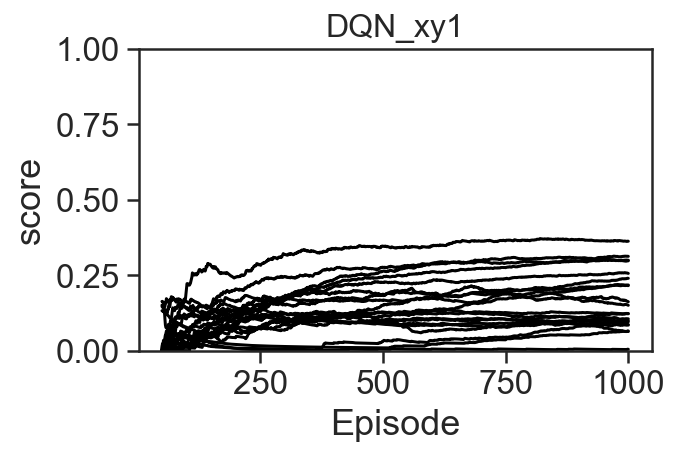

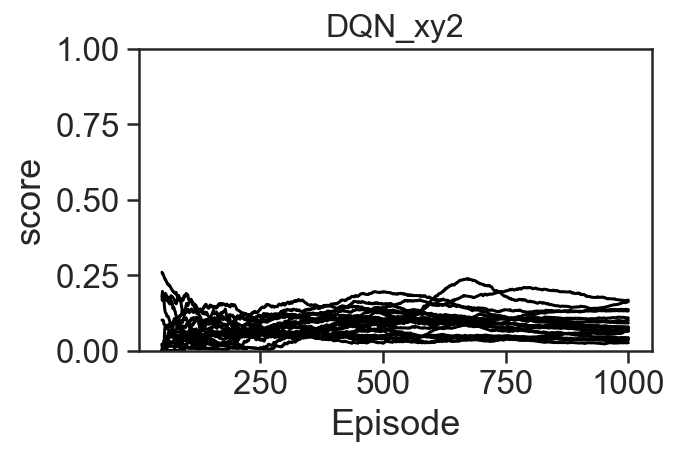

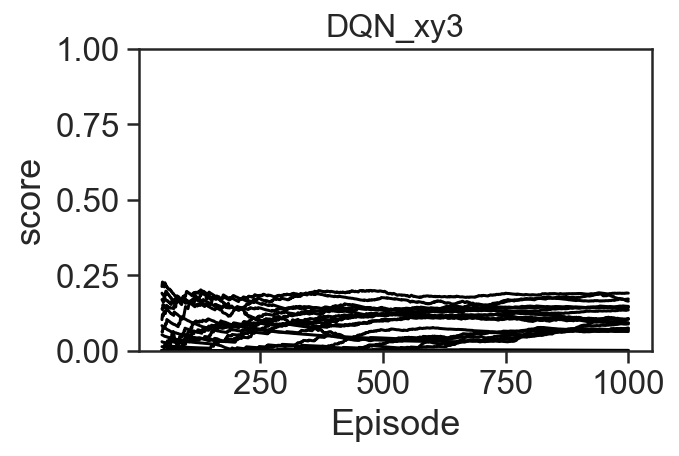

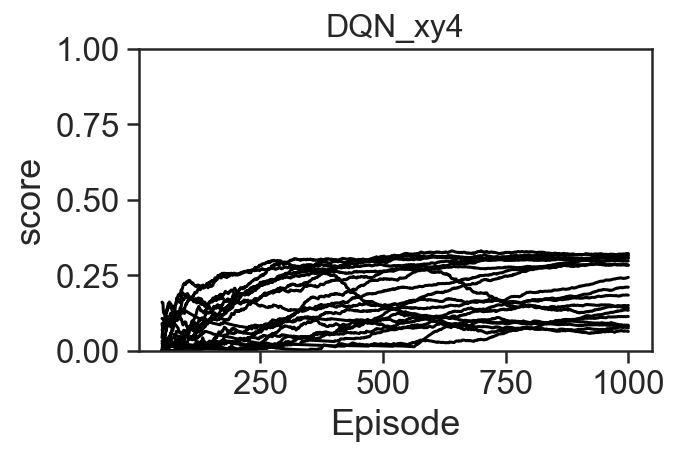

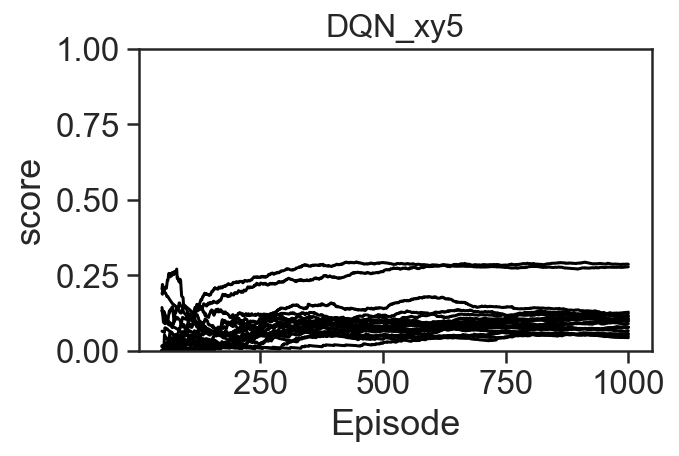

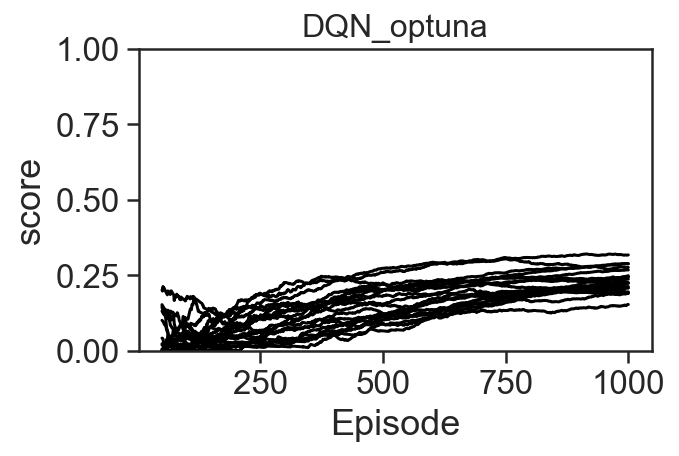

In [14]:
key = 'score'
for model in models:
    plt.figure(figsize=(5, 3))
    for r, mon in enumerate(data[model]):
        _ = plt.plot(mon['episode'], mon[key], color='black')
        _ = plt.ylim(0, 1)
    _ = plt.ylabel(f"{key}")
    _ = plt.tight_layout()
    _ = plt.xlabel("Episode")
    _ = plt.title(model)

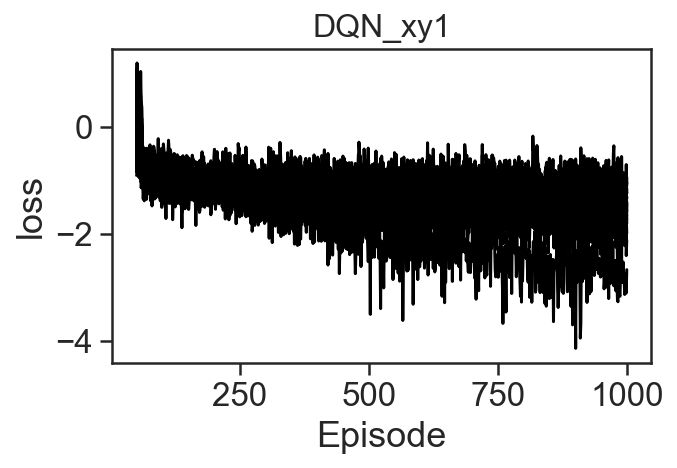

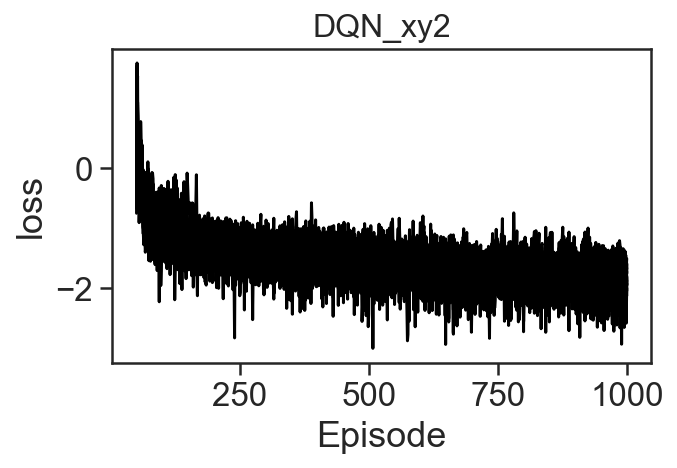

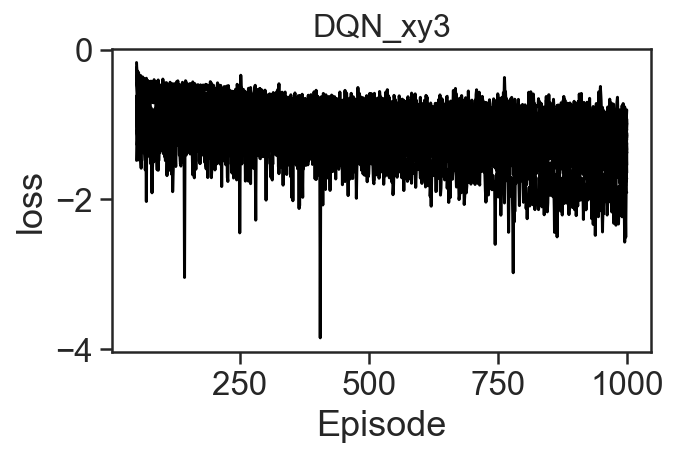

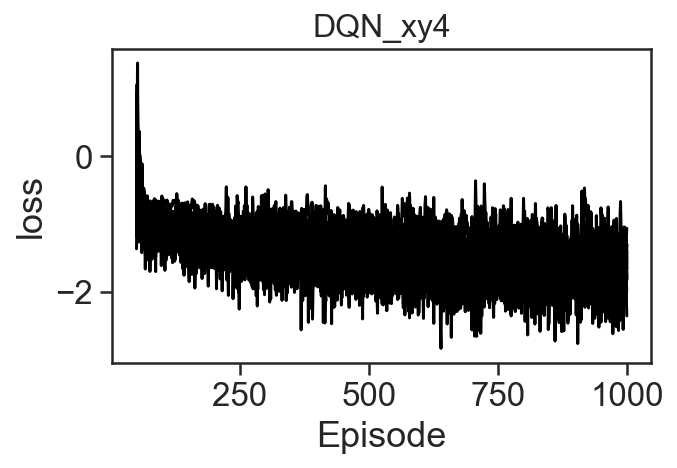

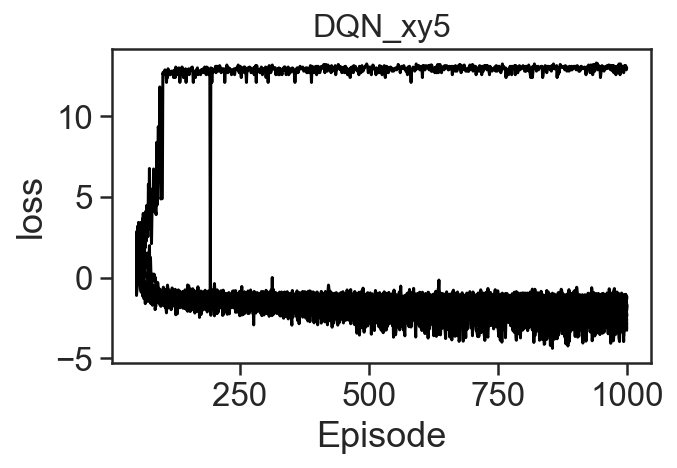

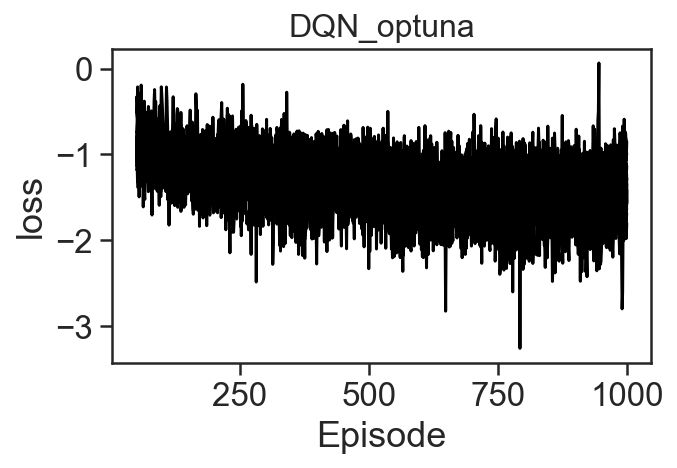

In [16]:
key = 'loss'
for model in models:
    plt.figure(figsize=(5, 3))
    for r, mon in enumerate(data[model]):
        _ = plt.plot(mon['episode'], np.log10(mon[key]), color='black')
    _ = plt.ylabel(f"{key}")
    _ = plt.tight_layout()
    _ = plt.xlabel("Episode")
    _ = plt.title(model)

- DQN sill quite poor. Network design is not playing a big role.

# Summarize 

What's it like as mean +/- sem

In [8]:
pprint(data[models[0]][0].keys())

dict_keys(['file', 'Q', 'advantage', 'episode', 'epsilon_e', 'loss', 'prediction_error', 'score'])


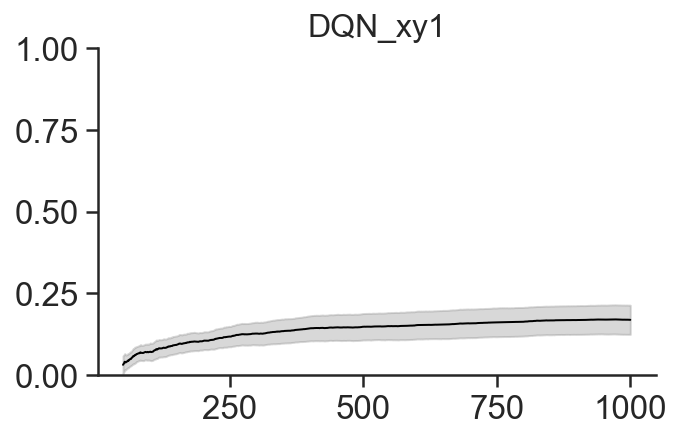

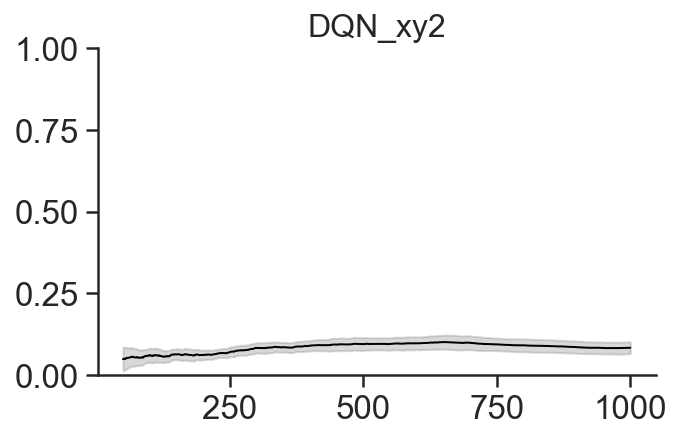

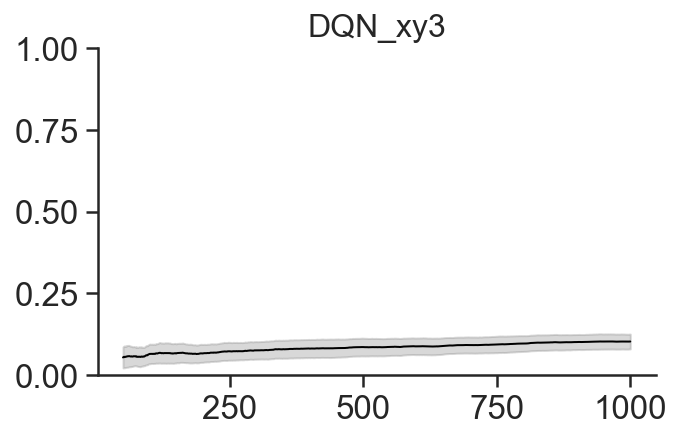

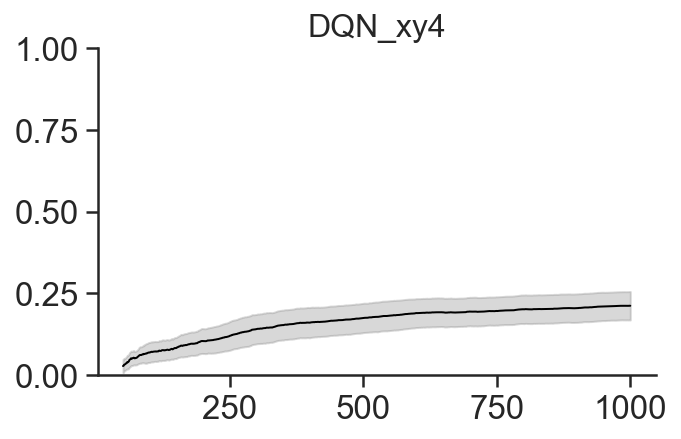

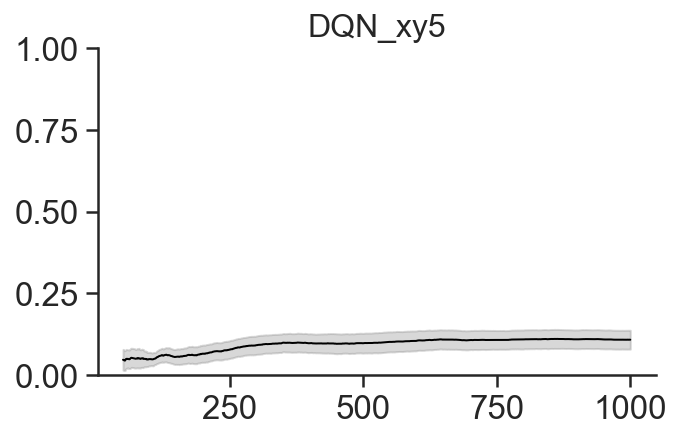

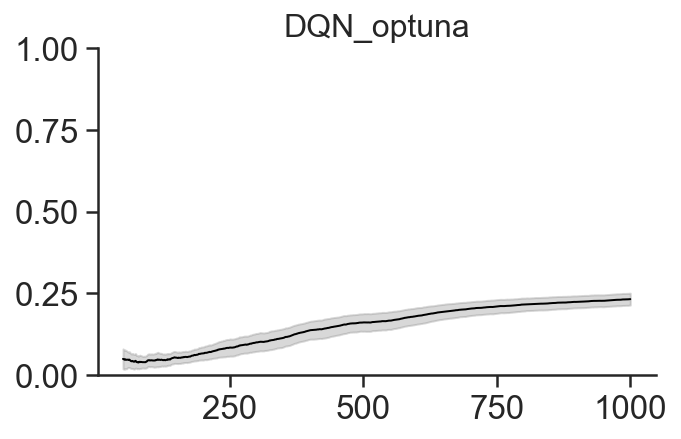

In [21]:
key = 'score'
for model in models:
    episodes, avg, sem = score_summary(data[model], key=key)
    plt.figure(figsize=(5, 3))
    _ = plt.plot(episodes, avg, linestyle="-", color='black', alpha=1.0, linewidth=1)
    _ = plt.fill_between(episodes, 
                           avg + 2*sem, 
                           avg - 2*sem,
                           color='grey', alpha=0.3)
    _ = plt.ylim(0, 1)
    _ = sns.despine()
    _ = plt.title(model)

# Summary plot

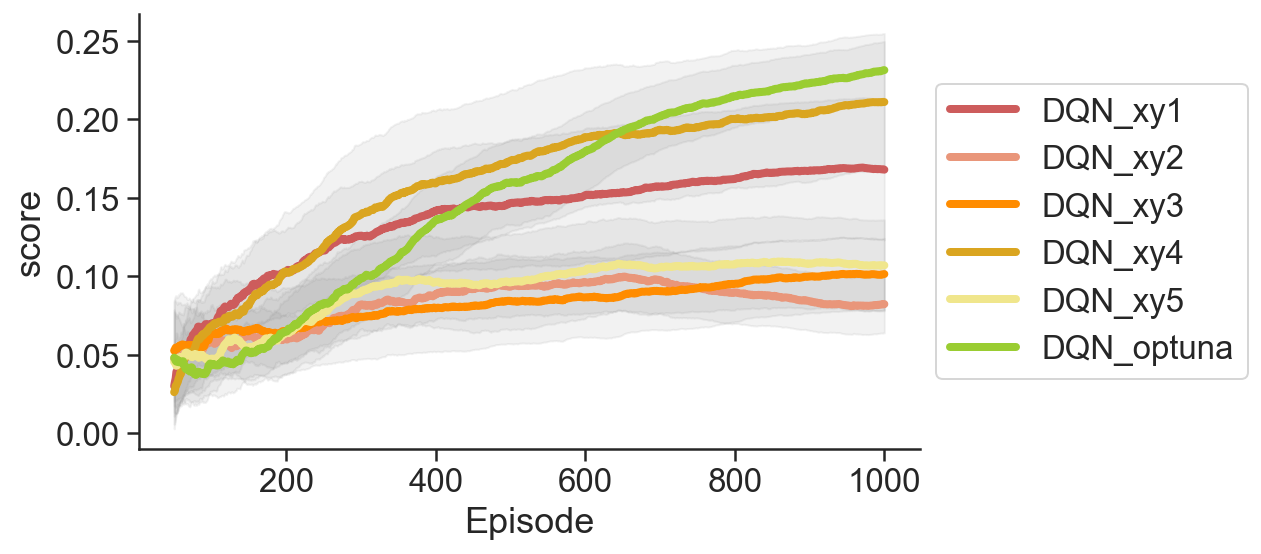

In [41]:
key = 'score'
colors = [ "indianred", "darksalmon", "darkorange", "goldenrod", "khaki", "yellowgreen"]
plt.figure(figsize=(7, 4))
for color, model in zip(colors, models):
    episodes, avg, sem = score_summary(data[model], key=key)
    _ = plt.plot(episodes, avg, linestyle="-", color=color, alpha=1.0, linewidth=4, label=model)
    _ = plt.fill_between(episodes, 
                           avg + 2*sem, 
                           avg - 2*sem,
                           color='grey', alpha=0.1)
_ = sns.despine()
_ = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.xlabel("Episode")
_ = plt.ylabel(key)

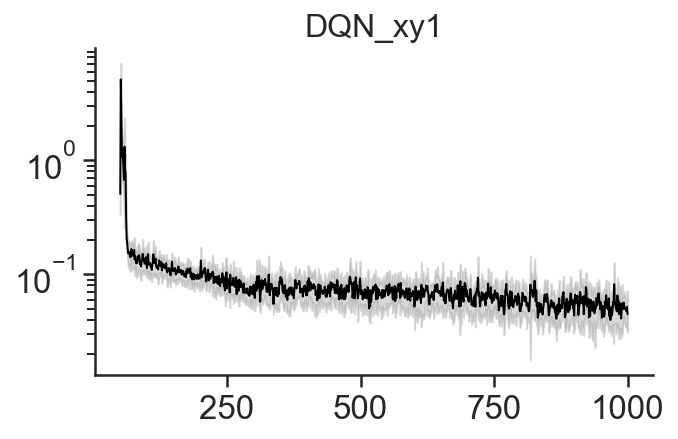

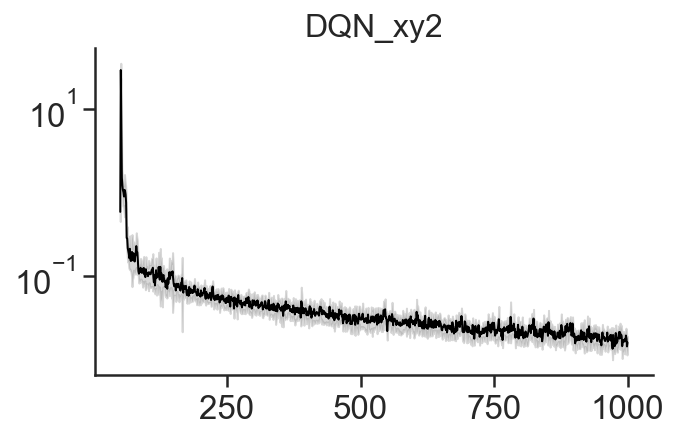

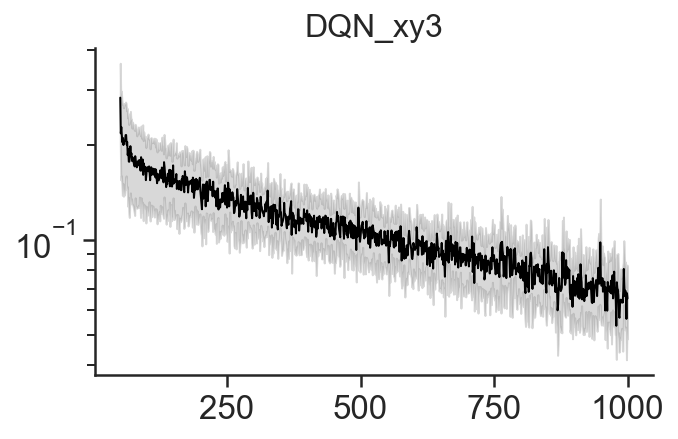

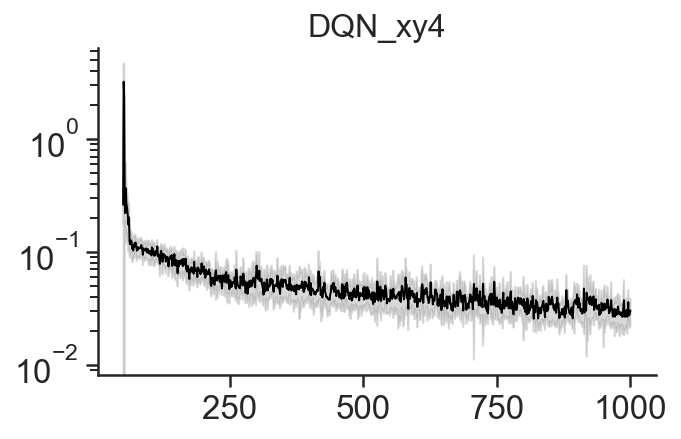

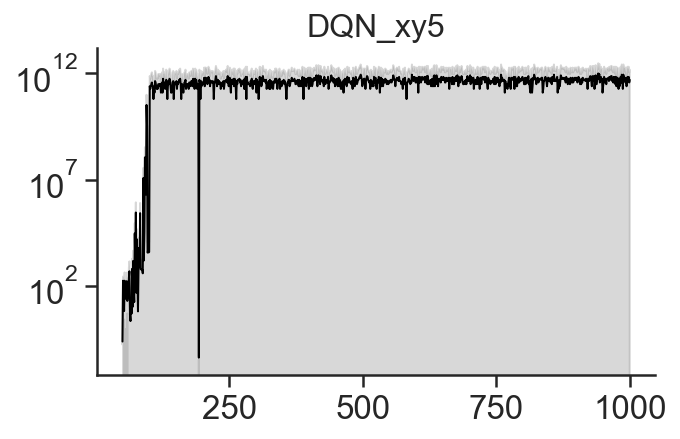

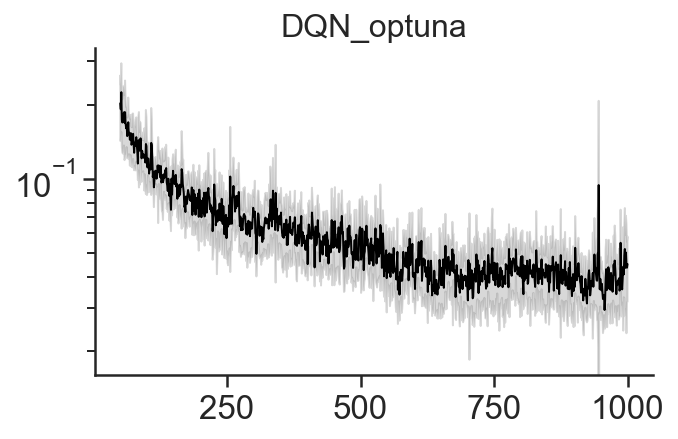

In [20]:
key = 'loss'
for model in models:
    episodes, avg, sem = score_summary(data[model], key=key)
    plt.figure(figsize=(5, 3))
    _ = plt.plot(episodes, avg, linestyle="-", color='black', alpha=1.0, linewidth=1)
    _ = plt.fill_between(episodes, 
                           avg + 2*sem, 
                           avg - 2*sem,
                           color='grey', alpha=0.3)
    _ = plt.yscale("log")
    _ = sns.despine()
    _ = plt.title(model)